In [7]:
# import torch
# from transformers import T5Tokenizer, T5ForConditionalGeneration
# from generate_data import MyDataset
# from datasets import Dataset
# from datasets import IterableDataset
# import torch
# import os,sys
# from model import RegressionModel
# from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer
# from torch.utils.data import TensorDataset, DataLoader, RandomSampler
# from torch.optim import AdamW
# import torch.nn as nn
# from sklearn.model_selection import train_test_split
# import tqdm
# import numpy as np
# from wireless import LOS_Env
# from transformers import pipeline, set_seed
# import transformers
# from transformers import LlamaTokenizer, LlamaForCausalLM
# from transformers import AutoModelForQuestionAnswering, AutoTokenizer, AutoModel, pipeline
import sionna
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

# Import Sionna RT components
from sionna.rt import load_scene, Transmitter, Receiver, PlanarArray, Camera

# For link-level simulations
from sionna.channel import cir_to_ofdm_channel, subcarrier_frequencies, OFDMChannel, ApplyOFDMChannel, CIRDataset
from sionna.nr import PUSCHConfig, PUSCHTransmitter, PUSCHReceiver
from sionna.utils import compute_ber, ebnodb2no, PlotBER
from sionna.ofdm import KBestDetector, LinearDetector
from sionna.mimo import StreamManagement

In [8]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
# Avoid warnings from TensorFlow
tf.get_logger().setLevel('ERROR')
tf.random.set_seed(1)  # Set global random seed for reproducibility

In [9]:
# scene = load_scene('mitsuba/campus/campus.xml')  # Try also sionna.rt.scene.etoile
scene = load_scene(sionna.rt.scene.munich)
scene.preview()

Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, …

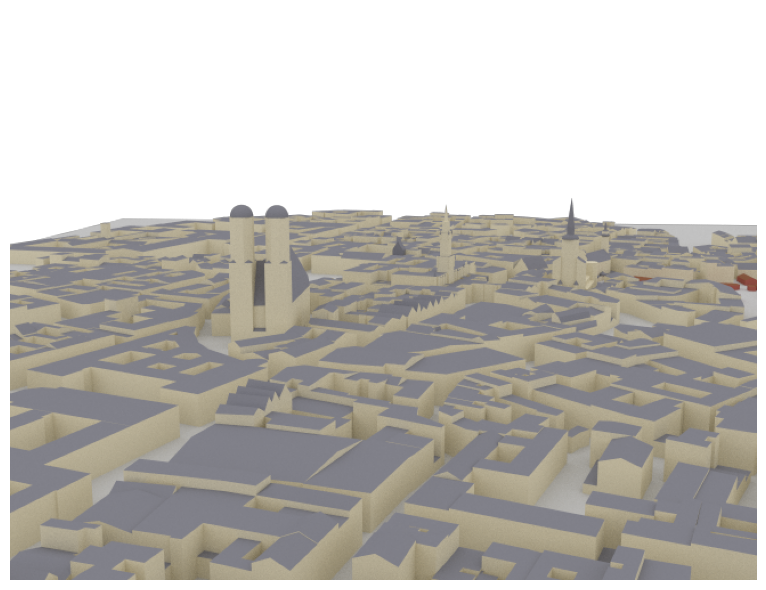

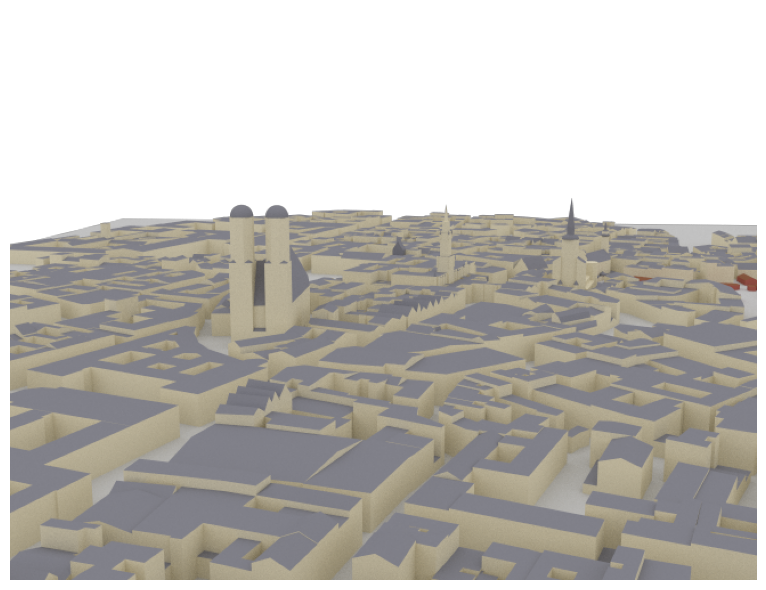

In [10]:
scene.render(camera="preview", num_samples=512)

In [11]:
# Configure antenna array for all transmitters
scene.tx_array = PlanarArray(num_rows=1,
                          num_cols=1,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="tr38901",
                          polarization="VH")

# Configure antenna array for all receivers
scene.rx_array = PlanarArray(num_rows=1,
                          num_cols=1,
                          vertical_spacing=0.5,
                          horizontal_spacing=0.5,
                          pattern="dipole",
                          polarization="cross")

# Create transmitter
tx = Transmitter(name="tx",
              position=[150,100,50],
              orientation=[0,0,0])
scene.add(tx)

# Create a receiver
rx = Receiver(name="rx",
           position=[250,-150,1.5],
           orientation=[0,0,0])
scene.add(rx)

# TX points towards RX
tx.look_at(rx)

print(scene.transmitters)
print(scene.receivers)

{'tx': <sionna.rt.transmitter.Transmitter object at 0x0000028B9FFAD430>}
{'rx': <sionna.rt.receiver.Receiver object at 0x0000028B9FFADF70>}


In [12]:
cm = scene.coverage_map()

UnknownError: {{function_node __wrapped__FloorMod_device_/job:localhost/replica:0/task:0/device:GPU:0}} JIT compilation failed. [Op:FloorMod]